# State Space Analysis

## Setup

Import the setup module, which runs shared notebook configuration methods, such as loading IPython modules:

In [1]:
import project_path
import notebooks.setup

time: 18.2 ms (started: 2021-05-28 17:51:54 +02:00)


## Dependencies

Import notebook specific depependencies:

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.io as pio

pd.options.plotting.backend = "plotly"

time: 437 ms (started: 2021-05-28 17:51:54 +02:00)


In [3]:
from experiments.run import run
import visualizations as visualizations

time: 694 ms (started: 2021-05-28 17:51:54 +02:00)


## Experiment

Import the experiment to be run and analysed in this notebook:

In [5]:
from experiments.templates.state_space import experiment

time: 671 ms (started: 2021-05-28 17:52:08 +02:00)


Run the experiment, and get the post-processed Pandas DataFrame:

In [6]:
df, _exceptions = run(experiment)

2021-05-28 17:52:10,066 - root - INFO - Running experiment
2021-05-28 17:52:10,174 - root - INFO - Starting simulation 0 / run 0 / subset 0
2021-05-28 17:52:14,700 - root - INFO - Experiment complete
time: 5.74 s (started: 2021-05-28 17:52:10 +02:00)


In [7]:
df

phase                  timestamp    eth_price    eth_supply  eth_staked  \
1       2.0 2021-05-28 17:51:55.128625  1587.851617  1.155532e+08   3897408.0   
2       2.0 2021-05-29 17:51:55.128625  1618.481617  1.155676e+08   3919168.0   
3       2.0 2021-05-30 17:51:55.128625  1620.067403  1.155820e+08   3940768.0   
4       2.0 2021-05-31 17:51:55.128625  1624.888145  1.155964e+08   3962368.0   
5       2.0 2021-06-01 17:51:55.128625  1594.626665  1.156109e+08   3983968.0   
...     ...                        ...          ...           ...         ...   
1796    4.0 2026-04-27 17:51:55.128625  1619.936738  1.091457e+08  42669568.0   
1797    4.0 2026-04-28 17:51:55.128625  1586.957035  1.091413e+08  42691168.0   
1798    4.0 2026-04-29 17:51:55.128625  1547.991972  1.091370e+08  42712768.0   
1799    4.0 2026-04-30 17:51:55.128625  1552.234117  1.091326e+08  42734368.0   
1800    4.0 2026-05-01 17:51:55.128625  1500.657651  1.091283e+08  42755968.0   

      supply_inflation  network_issuance  pow_issuance  \
1             0.045527      14401.549888     60.222222   
2             0.045528      14403.809787     60.222222   
3             0.045529      14405.985985     60.222222   
4             0.045530      14408.153682     60.222222   
5             0.045531      14410.274679     60.222222   
...                ...               ...           ...   
1796         -0.014574      -4355.294528      0.000000   
1797         -0.014570      -4353.874530      0.000000   
1798         -0.014566      -4352.448731      0.000000   
1799         -0.014561      -4351.028732      0.000000   
1800         -0.014557      -4349.602934      0.000000   

      number_of_validators_in_activation_queue  average_effective_balance  \
1                                            5               3.200000e+10   
2                                            0               3.200000e+10   
3                                            0               3.200000e+10   
4                                            0               3.200000e+10   
5                                            0               3.200000e+10   
...                                        ...                        ...   
1796                                         0               3.200000e+10   
1797                                         0               3.200000e+10   
1798                                         0               3.200000e+10   
1799                                         0               3.200000e+10   
1800                                         0               3.200000e+10   

      ...  total_revenue_yields_pct  total_profit_yields_pct  \
1     ...                  8.061142                 7.528370   
2     ...                  8.037657                 7.508067   
3     ...                  8.013973                 7.485746   
4     ...                  7.990467                 7.463794   
5     ...                  7.966785                 7.439490   
...   ...                       ...                      ...   
1796  ...                  5.085276                 4.713626   
1797  ...                  5.083931                 4.710279   
1798  ...                  5.082591                 4.706447   
1799  ...                  5.081248                 4.705461   
1800  ...                  5.079911                 4.700618   

      revenue_profit_yield_spread_pct  total_online_validator_rewards_eth  \
1                         0.532772                          851.662388   
2                         0.529590                          853.922287   
3                         0.528226                          856.098485   
4                         0.526674                          858.266182   
5                         0.527295                          860.387179   
...                            ...                                 ...   
1796                      0.371651                         5882.037972   
1797                      0.373652             

time: 74 ms (started: 2021-05-28 17:52:15 +02:00)


## Analysis

Analyze and visualize the results:

### Ethereum System States

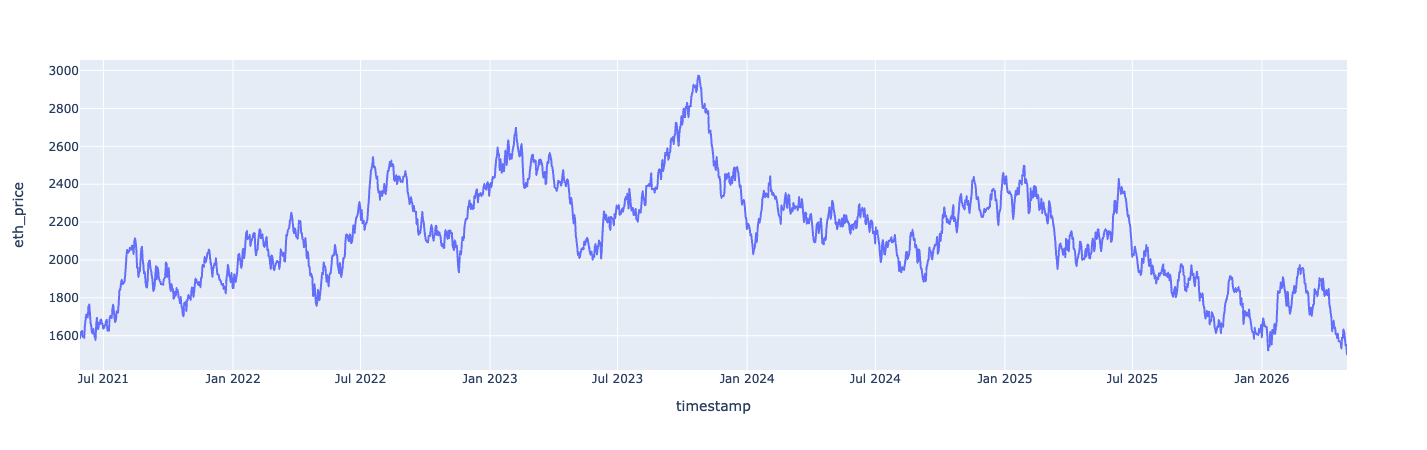

time: 836 ms (started: 2021-05-28 17:52:15 +02:00)


In [8]:
df.plot(x='timestamp', y='eth_price')

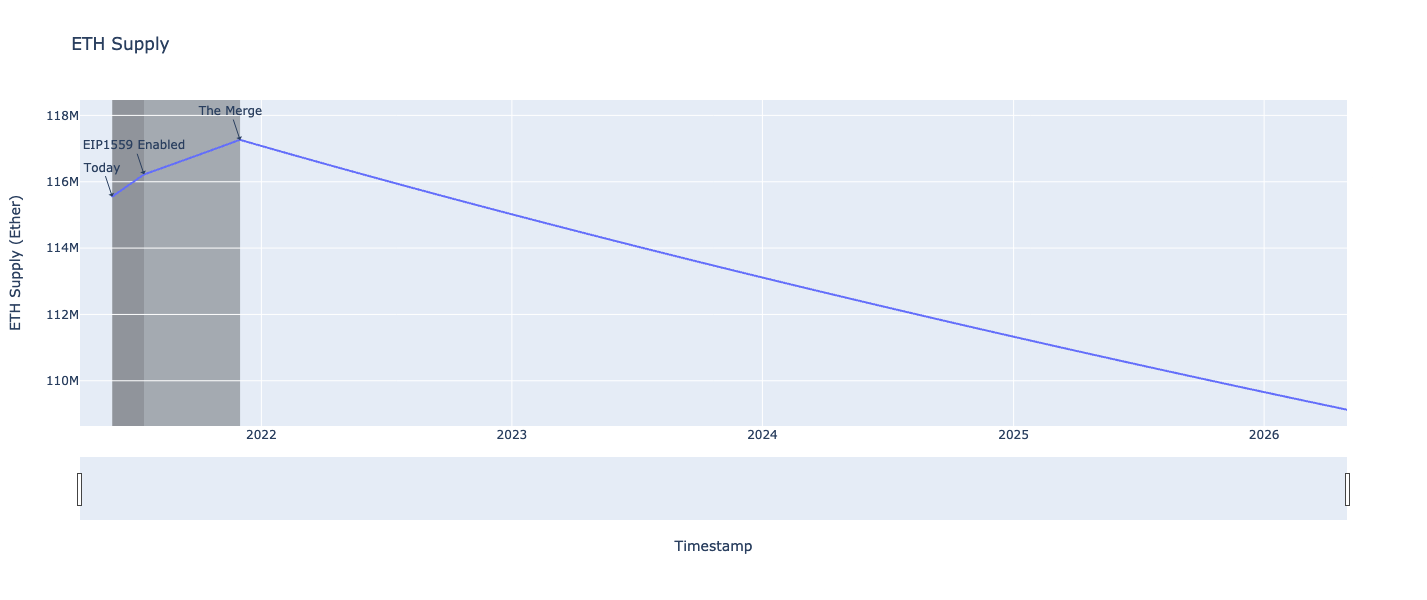

time: 2.79 s (started: 2021-05-28 17:52:16 +02:00)


In [9]:
df = df.set_index('timestamp', drop=False)
fig = visualizations.plot_eth_supply_over_all_stages(df)
pio.write_image(fig, "../../outputs/eth_supply_stages.png", width=1080, height=720)
fig.show()

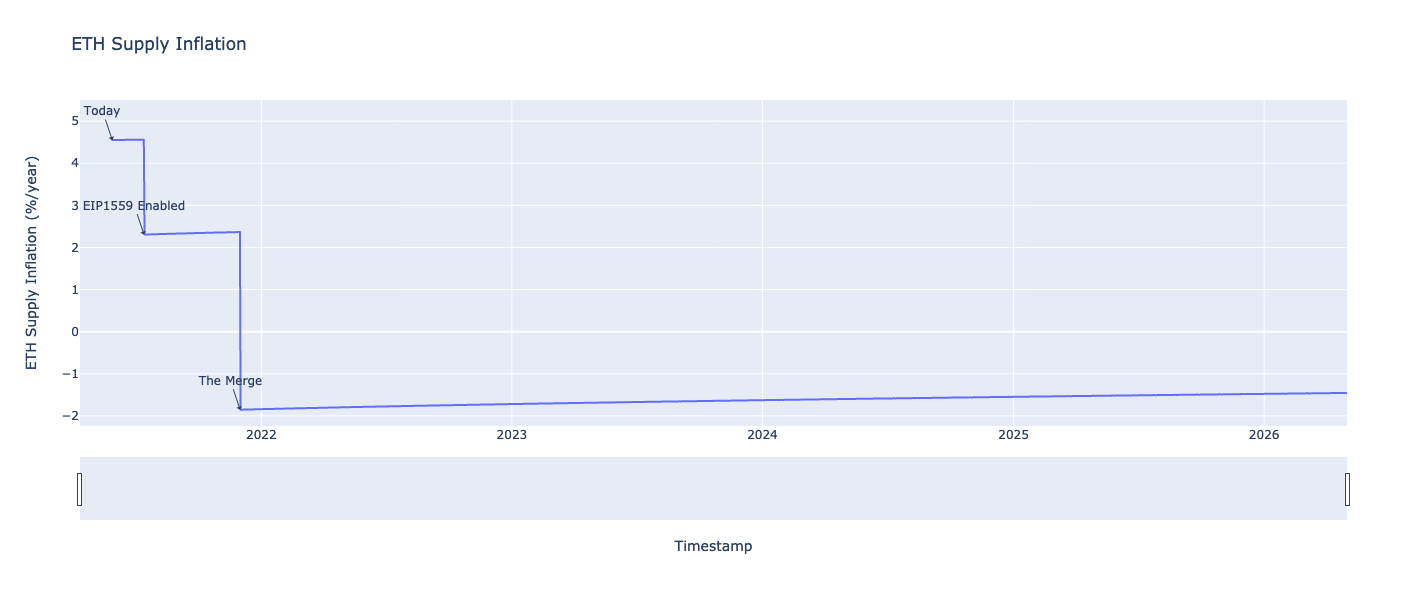

time: 156 ms (started: 2021-05-28 17:52:19 +02:00)


In [10]:
visualizations.plot_eth_supply_inflation_over_all_stages(df)

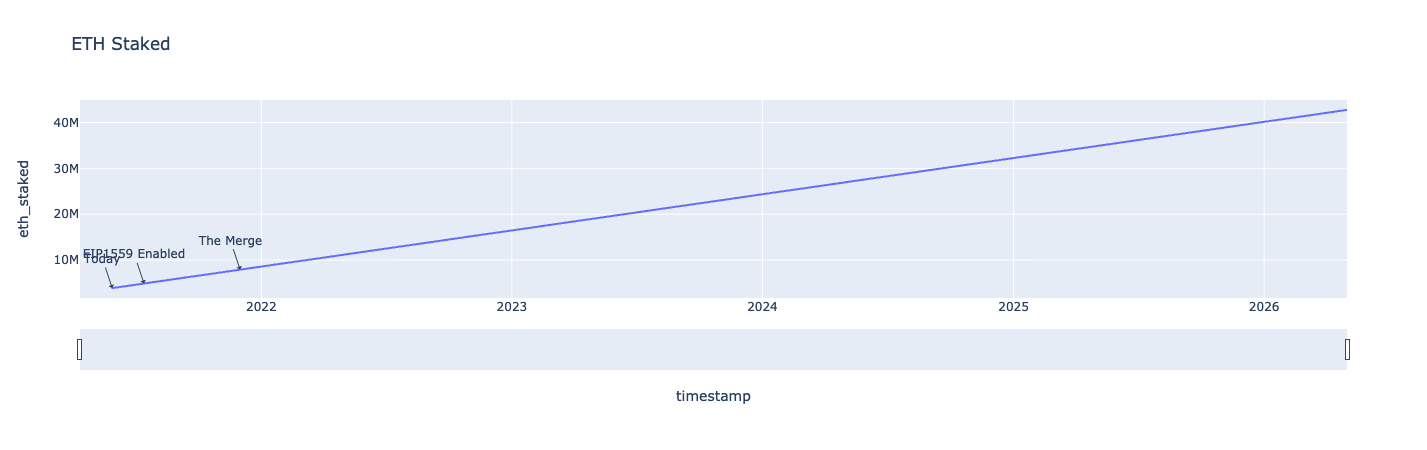

time: 137 ms (started: 2021-05-28 17:52:19 +02:00)


In [11]:
visualizations.plot_eth_staked_over_all_stages(df)

### Validator Rewards

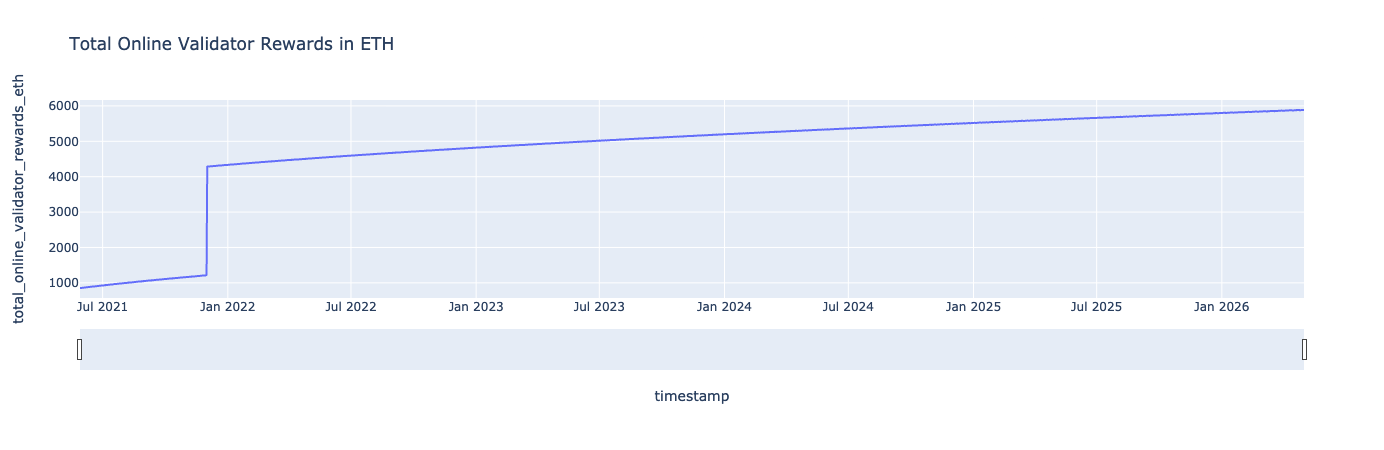

time: 144 ms (started: 2021-05-28 17:52:19 +02:00)


In [12]:
fig = df.plot(x='timestamp', y='total_online_validator_rewards_eth', title='Total Online Validator Rewards in ETH')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### Validator Revenue and Profit

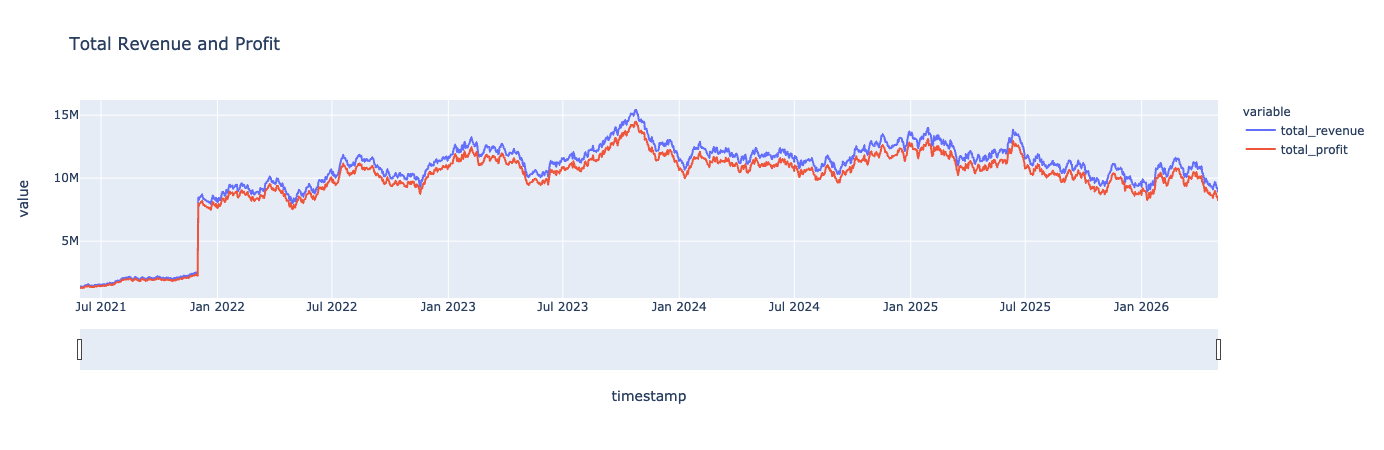

time: 225 ms (started: 2021-05-28 17:52:19 +02:00)


In [13]:
fig = df.plot(x='timestamp', y=['total_revenue', 'total_profit'], title='Total Revenue and Profit')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

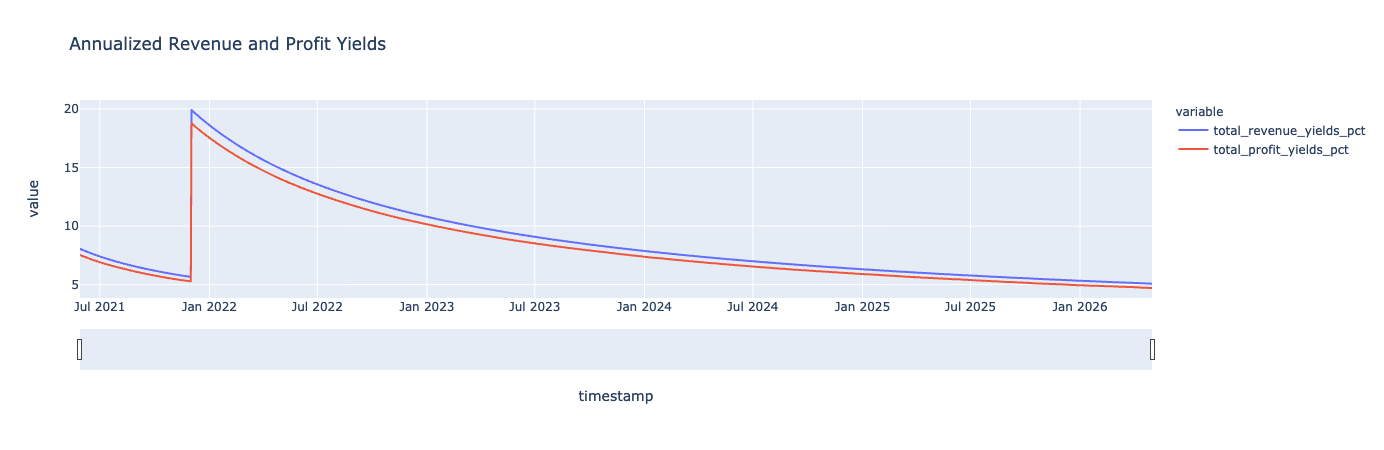

time: 222 ms (started: 2021-05-28 17:52:20 +02:00)


In [14]:
fig = df.plot(x='timestamp', y=['total_revenue_yields_pct', 'total_profit_yields_pct'], title='Annualized Revenue and Profit Yields')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

### Validator Costs

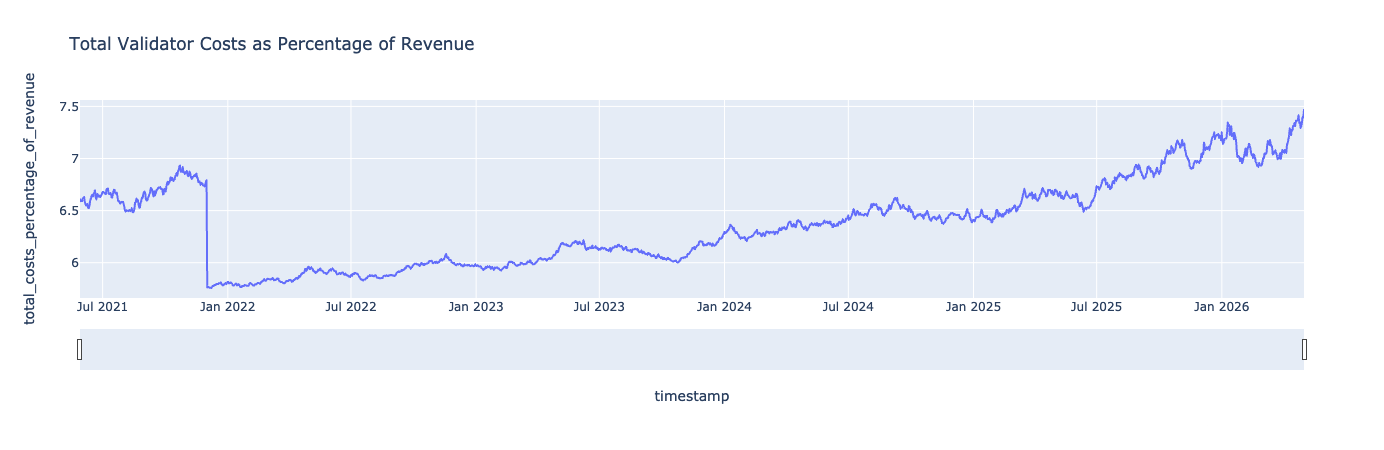

time: 147 ms (started: 2021-05-28 17:52:20 +02:00)


In [15]:
df['total_costs_percentage_of_revenue'] = (df['total_network_costs'] / df['total_revenue']) * 100

fig = df.plot(x='timestamp', y='total_costs_percentage_of_revenue', title='Total Validator Costs as Percentage of Revenue')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [16]:
from model.parameters import validator_environments

hardware_costs = [validator.type + '_hardware_costs' for validator in validator_environments]
cloud_costs = [validator.type + '_cloud_costs' for validator in validator_environments]
third_party_costs = [validator.type + '_third_party_costs' for validator in validator_environments]
validator_costs = [validator.type + '_costs' for validator in validator_environments]

time: 31.5 ms (started: 2021-05-28 17:52:20 +02:00)


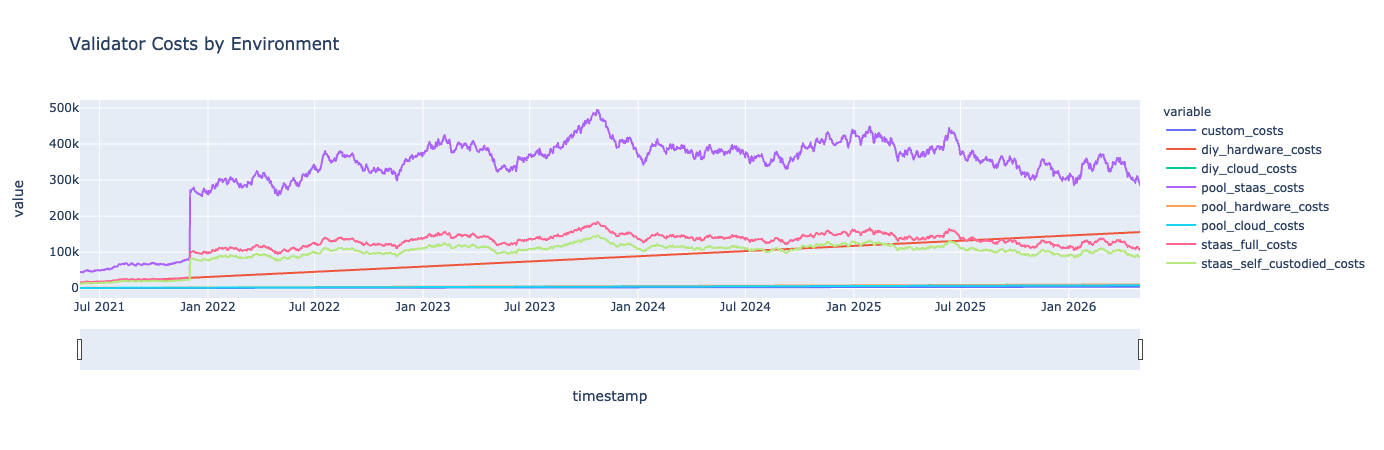

time: 618 ms (started: 2021-05-28 17:52:20 +02:00)


In [17]:
fig = df.plot(x='timestamp', y=validator_costs, title='Validator Costs by Environment')

fig.update_layout(
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()